# Simple Regression Modeling with Boston Housing dataset - Lab

In this final lab, we shall apply the regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We performed a detailed EDA for this dataset in earlier section and hence carry a good understanding of how this dataset is composed. This this lab we shall try to identify the predictive ability of some of features found in this dataset towards identifying house price. 

### Objectives:
You will be able to:
* Build many linear models with boston housing data set using OLS
* For each model, analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

Let's get started. 

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [1]:
# Your code here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
boston = pd.read_csv('BostonHousing.csv')

The data features and target are present as columns in boston data. Boston data gives a set of independent as independent variables in data and the housing rate as `MEDV` in target property. Also feature names are listed in feature_names. The desription is available at [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [2]:
boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Record your observations here 

chas and rad are categorical variables

no null values, all cells are data type of int64


### Create histograms for all variables in the dataset and comment on their shape (uniform or not ?)

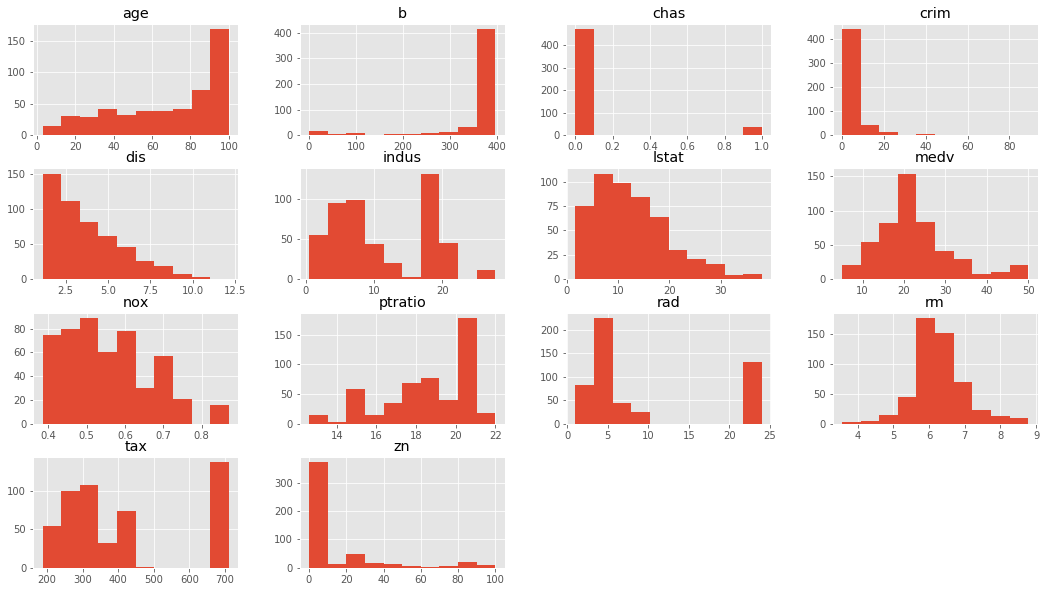

In [5]:
fig1 = boston.hist(figsize=(18,10))
plt.show()

# You observations here 

the only factor that may be normally distributed is rm (rooms per dwelling)

multiple factors appear to be skewed

clear outliers in tax, nox, ptratio, possible in others as well

Based on this , we shall choose a selection of features which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [6]:
# Your code here 
data = boston[['crim', 'dis', 'rm', 'zn', 'age', 'medv']].copy()
data.head(5)

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots and comment on the results

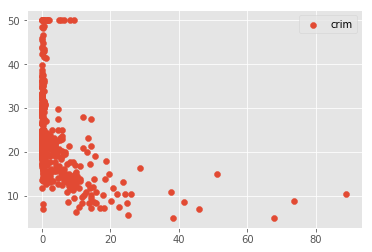

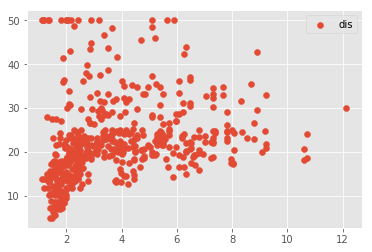

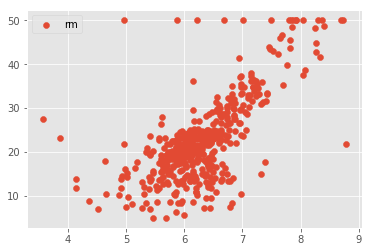

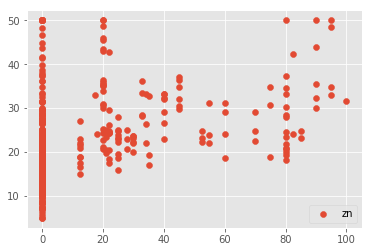

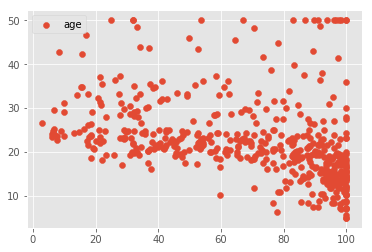

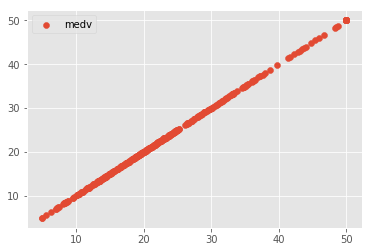

In [7]:
# Your code here 

for factor in data:
    plt.scatter(data[factor], data['medv'], label = factor)
    plt.legend()
    plt.show()


# solution version

# for column in ['crim', 'dis', 'rm', 'zn', 'age']:
#     plt.scatter(data[column], data.medv, label=column)
#     plt.legend()
#     plt.show()

# Your observations here 

Outliers present in all factors

There may be a signifigant relationship between rm and medv

Perhaps normalization and cleaning up outliers will yeild more information regarding relationships.


Okie so obviously our data needs a lot of pre-procesing to improve the results. This key behind such kaggle competitions is to process the data in such a way that we can identify the relationships and make predictions in the best possible way. For now, we shall leave the dataset untouched and just move on with regression. So far, our assumptions, although not too strong, but still hold to a level that we can move on. 

### Let's do Regression 

Right here is the real deal. Let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). We shall do this is a loop and in every iteration, we shall pick one of the independent variables  perform following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`.
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

/Users/giovanni/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           1.17e-19
Time:                        14:54:49   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

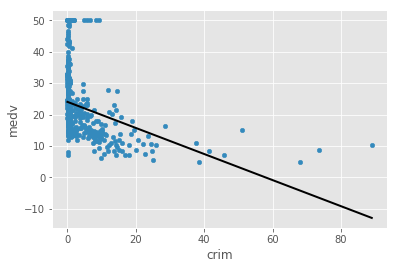

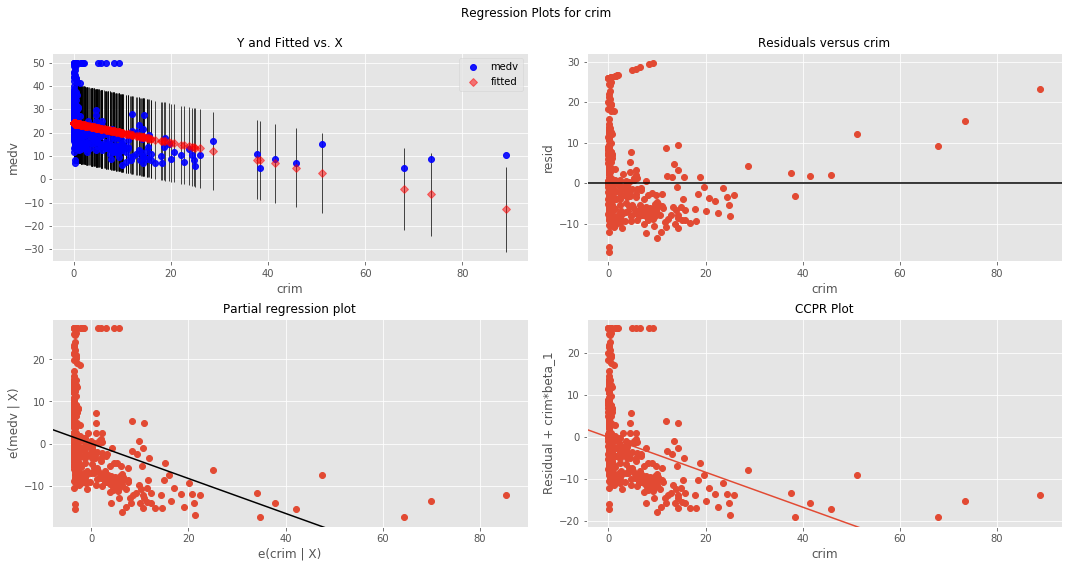

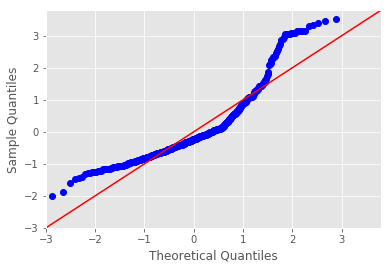

Press Enter to continue...
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           1.21e-08
Time:                        14:54:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901    

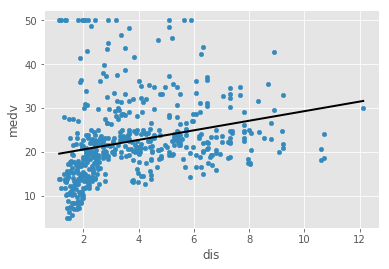

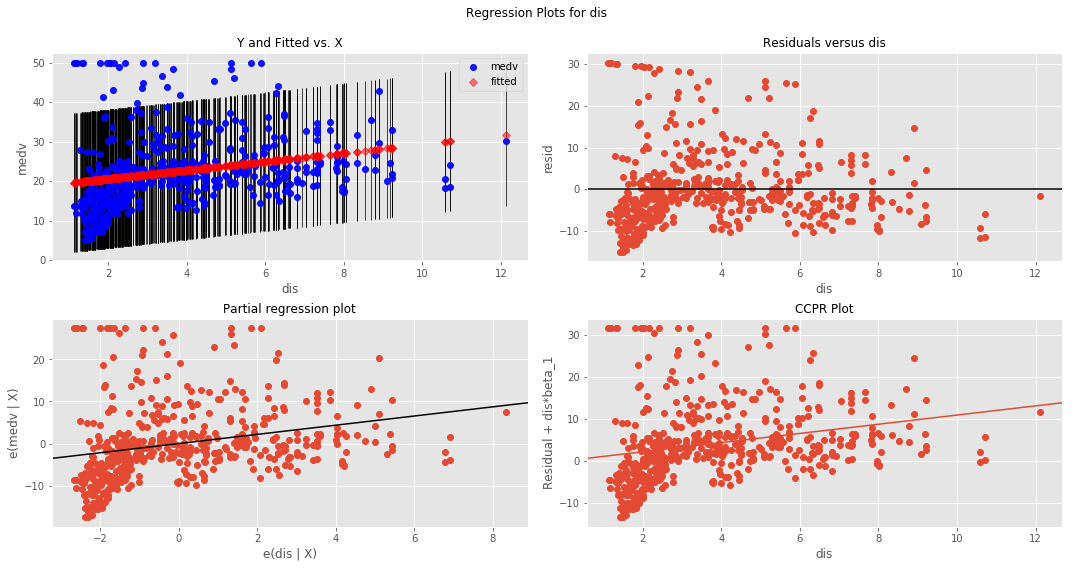

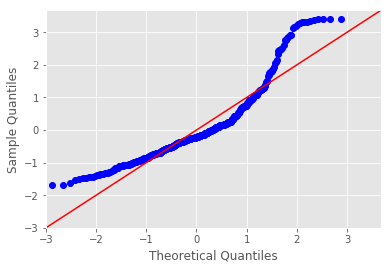

Press Enter to continue...
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.49e-74
Time:                        14:54:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706    

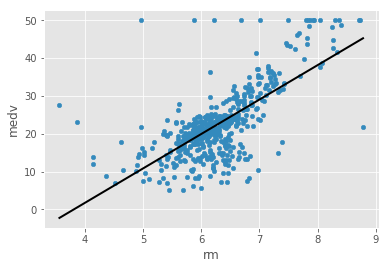

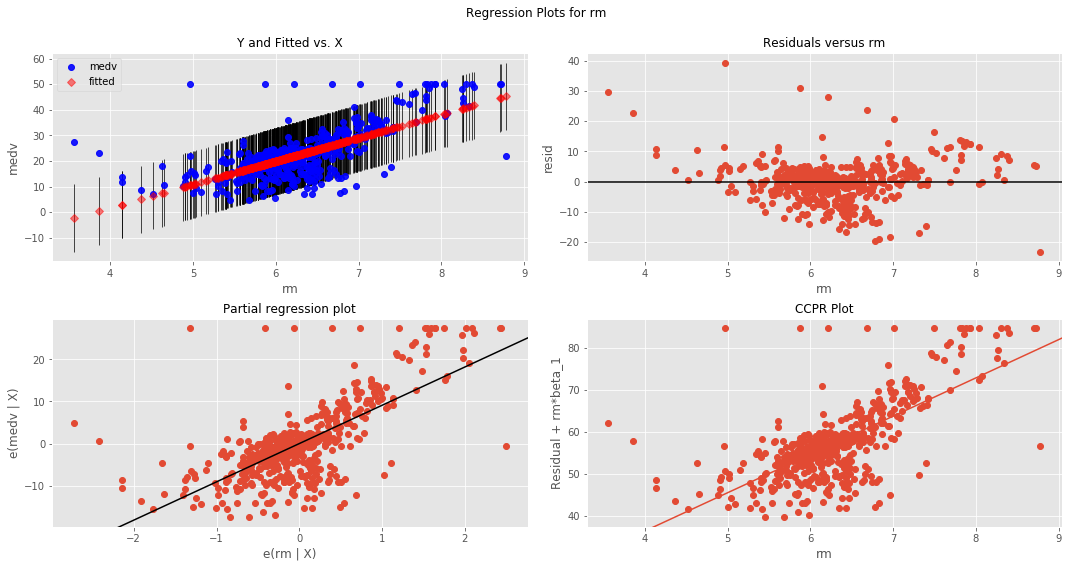

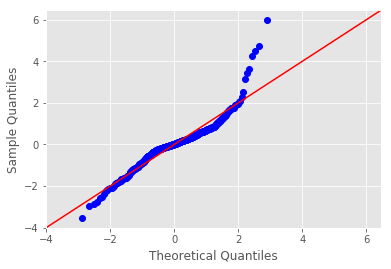

Press Enter to continue...
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     75.26
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           5.71e-17
Time:                        14:54:58   Log-Likelihood:                -1805.0
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     504   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9176    

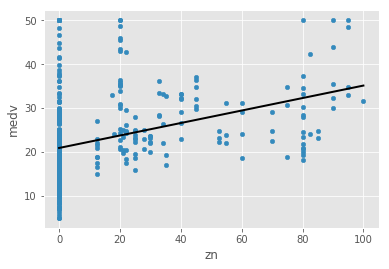

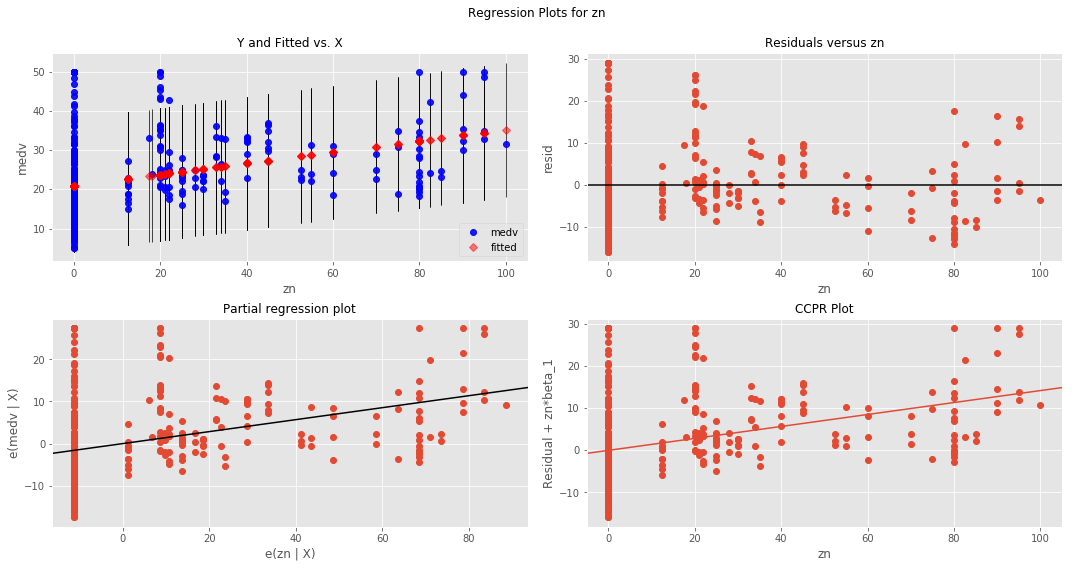

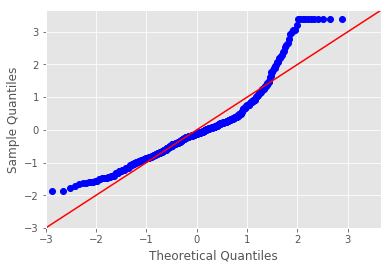

Press Enter to continue...
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           1.57e-18
Time:                        14:55:00   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787    

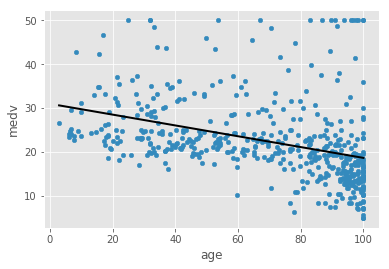

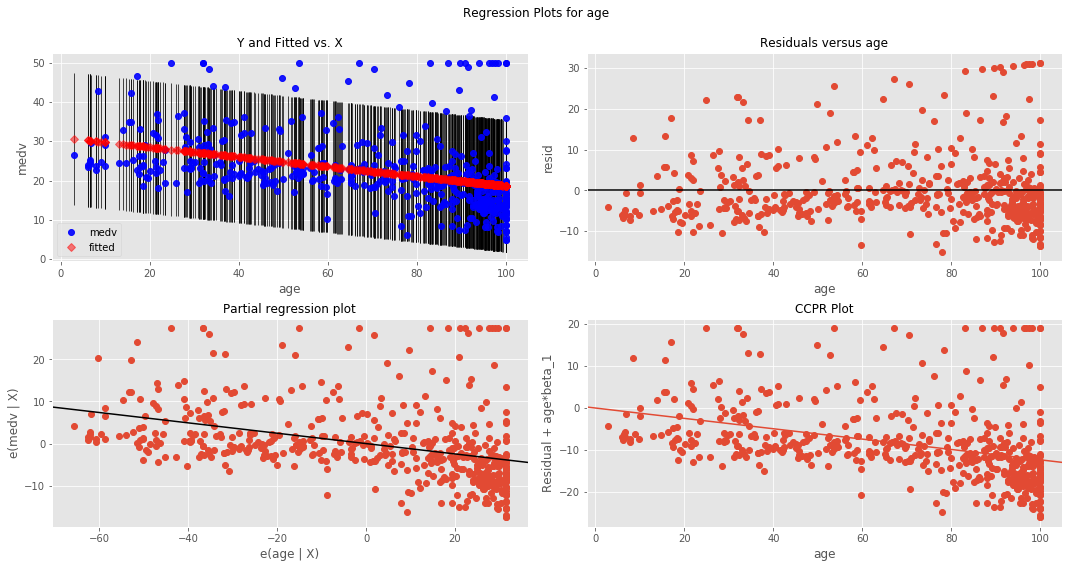

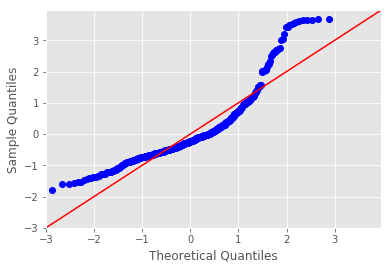

Press Enter to continue...


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
%matplotlib inline

factors = ['crim', 'dis', 'rm', 'zn', 'age']
results = [['Independent_Variable', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]


for factor in factors:
    f = 'medv~' + factor
    model = smf.ols(formula=f, data = data).fit()
    print(model.summary())


    
    print ("Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~" + factor)
    print ("-------------------------------------------------------------------------------------")

    min_max = pd.DataFrame({factor : [data[factor].min(), data[factor].max()]})
    pred_min_max = model.predict(min_max)
    data.plot(kind='scatter', x = factor, y = 'medv')
    plt.plot(min_max, pred_min_max, c = 'black', linewidth = 2)
    plt.show()
    
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, factor, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    results.append([factor, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

    
# solution version - corrected 11-8-2018 by Jeff Herman:





# import libraries
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# import statsmodels.stats.api as sms



# results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
# for idx, val in enumerate(['crim', 'dis', 'rm', 'zn', 'age']):
#     print ("Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~" + val)
#     print ("-------------------------------------------------------------------------------------")

#     f = 'medv~' + val
# #   
#     model = smf.ols(formula=f, data=data).fit()
    
#     X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]});
#     preds = model.predict(X_new)
#     data.plot(kind='scatter', x=val, y='medv');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
#     fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
#     plt.show()
    
#     results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
#     input("Press Enter to continue...")

In [12]:
# Your code here 


In [13]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,Independent_Variable,r_squared,intercept,slope,p-value,normality (JB)
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983


In [11]:
#Your obervations here 
# rm is the only factor that seems to show a significant correlation here.
# lots of outliers in all the factors, some factors have a very skewed distribution.







# from flatiron solution:
# We can do a detailed analysis of each exsperiment and eloborate in detail 
# Here we shall show a summary of selected observations

# Crime has a negative relationship with price i.e. less crime > higher price and vice vera
# Crime does not show any clear signs heteroscedasticity 
# Crime has a low r-squared so not such a good fit 
# Residuals not normally distributed (needs log normalization that we'll see in next section)

# a positive relationship between dis and medv
# dis residual plots show some signs of heteroscadasticity as cone shaped residuals
# normality is still questionable 

# rm shows a strong positive relationship
# rm residuals show no signs of heteroscdasticity however some outliers are present
# rm qqplot shows a long right tail which hurts normality 

# zn variable scatter shows a lot of variance  along y axis and hence gives a very slow r-swuared value
# no clear heteroscedasticity in residuals
# Normality through Q-Q plots and JB is far from perfect 

# age has a negative relatioship with prices i.e. young people > expensive houses :o
# Some obvious heteroscadasticity and normality is questionable.

So clearly the results are not highly reliable. the best good of fit i.e. r-squared is witnessed with `rm`. So clearly in this analysis this is our best predictor. 

---
#### So how can we improve upon these results . 
1. Pre-Processing 

This is where pre-processing of data comes in. Dealing with outliers, normalizing data, scaling values etc can help regression analysis get more meaningful results from the given set of data 

2. Advanced Analytical Methods

Simple regression is a very basic analysis techniques and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. In the next section we shall look at multiple regression where we can use multiple features **AT ONCE** to define a relationship with outcome. We shall also look at some pre-processing and data simplification techniques and re-visit the boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the the goodness of fit. 
![](https://i.pinimg.com/originals/e5/a5/1e/e5a51eff1b2133105ebaa9b779106ae2.png)

## Summary 

In this lab, we attempted to bring in all the skills learnt so far to a slighlt detailed dataset. We looked at the outcome of our analysis and realized that the data might need some pre-processing to see a clear improvement in results. We shall pick it up in the next section from this point and bring in data pre-processing techniques along with some assumptions that are needed for multiple regression . 